# Question 3:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import scipy.linalg as scln
from scipy.spatial import distance
import numpy.linalg as nplin
import pandas as pd  

In [3]:
def multivariate_Gaussian(mean, cov, sample):
    l = scln.cholesky(cov)
    z = np.random.normal(size=(sample, cov.shape[0]))
    return (z.dot(l)+mean)

In [4]:
def generateW(gamma,sample):
    mu = [0,0,0,0]
    cov = np.array(gamma*np.identity(4))
    return multivariate_Gaussian(mu, cov, sample)

In [5]:
#assumptions taken
noisesigma = np.array([.2])
gamma = [10**i for i in range(-5,5)]
trueroot = np.random.uniform(-1,1,3)
wtrue = np.poly(trueroot)
sample = 10

In [6]:
def datageneration(noisesigma, wtrue, sample):
    #generating pdfs
    x = (np.array(np.random.uniform(-1,1,sample))).reshape(sample,1)
    w = np.array(wtrue)
    X = []
    v = multivariate_Gaussian([0], noisesigma**2, sample)
    #calculating y
    for i in range(0,sample):
        X.append([x[i,0]**3,x[i,0]**2,x[i,0],x[i,0]**0])
    X = np.array(X)
    Y = (np.multiply(w,X))
    y = []
    for i in range(0,10):
        y.append(sum(Y[i])+v[i,0])
    y = np.array(y).reshape(len(y),1)
    #plt.figure(1,figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    #plt.scatter(x,y)
    #plt.show()
    return ([X,y[:,0]])

In [7]:
def generatingl2(gamma, wtrue,sample,noisesigma):
    L2 = []
    for i in range(0,100):
        a = datageneration(noisesigma, wtrue, sample)
        X = np.array(a[0])
        y = np.array(a[1])
        y = y.reshape(y.shape[0],1)
        wtrue1 = wtrue.reshape(wtrue.shape[0],1)
        q = np.matrix(((noisesigma[0]**2)/gamma)*np.identity(4)+np.matmul(X.T,X))
        wmap = np.matmul(q.I,np.matmul(X.T,y))
        l2 = -(wtrue1 - wmap.T)
        l2 = np.array(l2)
        l2 = sum(l2[0]**2)
        L2.append(l2)
    return L2

In [8]:
Z=[]
for i in range(0,len(gamma)):
    z = (generatingl2(gamma[i], wtrue,sample,noisesigma))
    print("For gamma=",gamma[i],":")
    print("minimum value of L2 distance : ", np.quantile(z, 0))
    print("25% value of L2 distance : ", np.quantile(z, .25)) 
    print("median value of L2 distance : : ", np.quantile(z, .50)) 
    print("75% value of L2 distance : : ", np.quantile(z, .75))
    print("maximum value of L2 distance : ", np.quantile(z, 1))
    Z.append(z)
pos = [i for i in range(0,len(gamma))]
print(len(Z), len(pos))

For gamma= 1e-05 :
minimum value of L2 distance :  3.9979903121479374
25% value of L2 distance :  3.9994844711114648
median value of L2 distance : :  3.9999701283783367
75% value of L2 distance : :  4.0004008560204385
maximum value of L2 distance :  4.001345645498614
For gamma= 0.0001 :
minimum value of L2 distance :  3.98031826251073
25% value of L2 distance :  3.993680796995657
median value of L2 distance : :  3.998316128786687
75% value of L2 distance : :  4.002530186402144
maximum value of L2 distance :  4.013008713335798
For gamma= 0.001 :
minimum value of L2 distance :  3.8644942100427495
25% value of L2 distance :  3.9482483097354306
median value of L2 distance : :  3.99083012154938
75% value of L2 distance : :  4.028531297711335
maximum value of L2 distance :  4.090482058801772
For gamma= 0.01 :
minimum value of L2 distance :  3.3799551710397875
25% value of L2 distance :  3.765116268036546
median value of L2 distance : :  3.874061437151591
75% value of L2 distance : :  3.99827

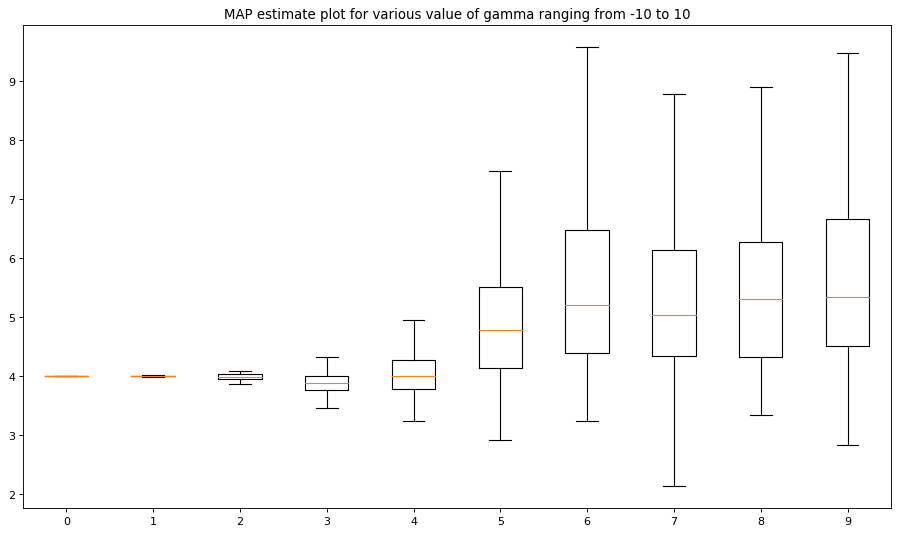

In [9]:
plt.figure(1,figsize=(14,8), dpi=80, facecolor='w', edgecolor='k' )
plt.boxplot(Z,positions=pos,showfliers=False)
plt.title("MAP estimate plot for various value of gamma ranging from -5 to 5")
plt.show() 

# As the parameter of the prior, which is gamma value, changes between the range of 10^(-5) to 10^(5) the difference between the minimum, 25%, median, 75% and maximum increases. As the value of gamma increases the MAP estimates approaches maximum liklihood estimate.